In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

In [3]:
dataset= load_dataset('lukebarousse/data_jobs')

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\chairman\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Sun Aug 25 01:49:57 2024).


In [4]:
df = dataset['train'].to_pandas()

In [5]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x )

In [6]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [7]:
df_DA['month_no'] = df_DA['job_posted_date'].dt.month

In [9]:
df_explode = df_DA.explode('job_skills')

In [12]:
df_DA_piv = df_explode.pivot_table(index= 'month_no', columns= 'job_skills', aggfunc= 'size', fill_value = 0)
df_DA_piv

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [13]:
df_DA_piv.loc['Total'] = df_DA_piv.sum()
df_DA_piv

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [14]:
df_DA_piv = df_DA_piv[df_DA_piv.loc['Total'].sort_values(ascending= False).index]

In [15]:
df_DA_piv

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_DA_piv= df_DA_piv.drop('Total')
df_DA_piv

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_DA_piv.iloc[0:0, 0:3]

job_skills,sql,excel,python
month_no,,,


In [23]:
df_DA_piv = df_DA_piv.reset_index()
df_DA_piv['month'] = pd.to_datetime(df_DA_piv['month_no'],format= '%m').dt.strftime('%b')
df_DA_piv = df_DA_piv.set_index('month')
df_DA_piv = df_DA_piv.drop(columns= 'month_no')

In [24]:
df_DA_piv

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [34]:
final_DA = df_DA_piv.iloc[: , :5]

In [67]:
final_DA

job_skills,sql,excel,python,tableau,power bi
month,,,,,
Jan,11336,8170,6606,5596,4285
Feb,7947,5772,4751,3936,3307
Mar,7868,5675,4741,4051,3176
Apr,7553,5496,4557,3776,3106
May,6617,4773,4070,3245,2695
Jun,7584,5724,4707,3812,3275
Jul,7687,5513,4831,3928,3350
Aug,8823,6482,5576,4533,3859
Sep,6829,4886,4229,3446,3118


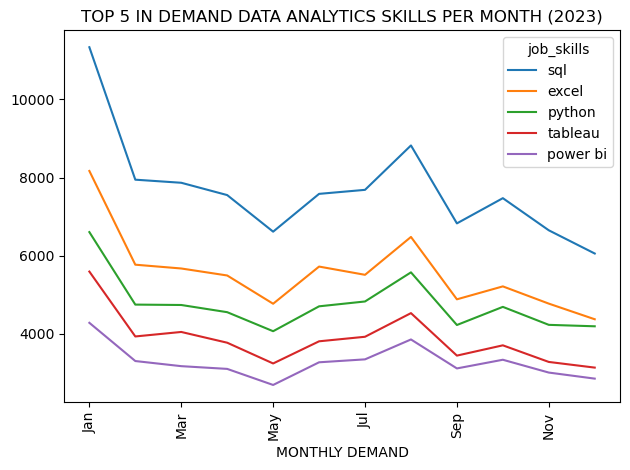

In [73]:
final_DA.plot(kind='line') 
plt.title('TOP 5 IN DEMAND DATA ANALYTICS SKILLS PER MONTH (2023)')
plt.ylabel('')
plt.xlabel('MONTHLY DEMAND')
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

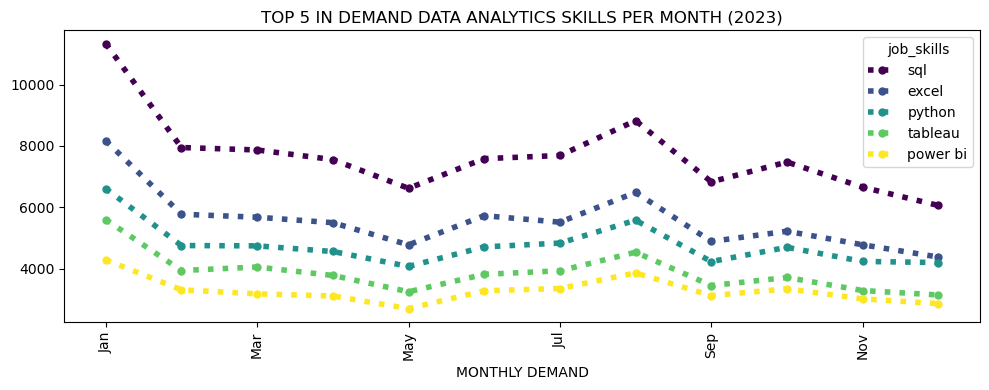

In [75]:
# advanced customization
final_DA.plot(
    kind='line',
    linewidth=4,
    linestyle=':',  # options: '--','-','-.'
    colormap='viridis', # options: 'cividis','plasma','inferno','magma'
    marker= 'o', # '*','+','x','1','2','3' .....
    markersize=5, #should be bigger than the line size for visibility
    figsize=(10,4)
)

plt.title('TOP 5 IN DEMAND DATA ANALYTICS SKILLS PER MONTH (2023)')
plt.ylabel('')
plt.xlabel('MONTHLY DEMAND')
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

In [43]:
df_DA.head(0)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_no


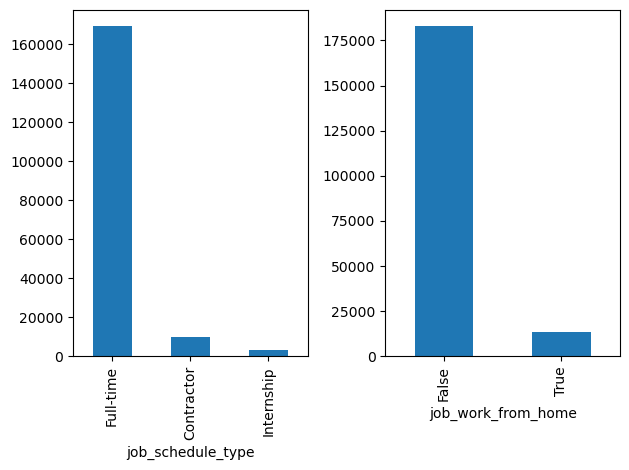

In [44]:
#subplots with pandas
fig , ax = plt.subplots(1,2)

df_DA['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])
df_DA['job_work_from_home'].value_counts().plot(kind='bar', ax=ax[1])
fig.tight_layout()
plt.show()

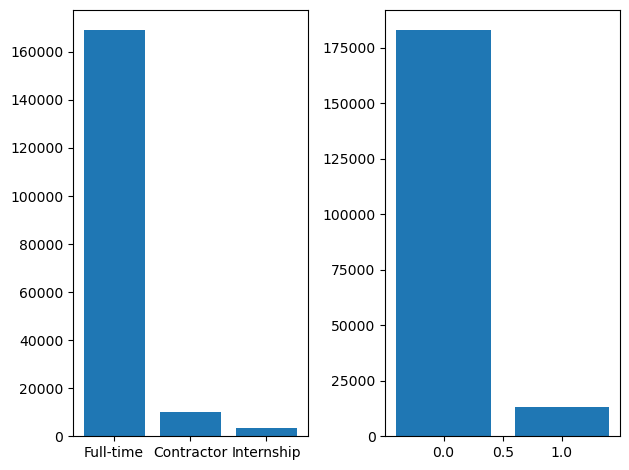

In [45]:
#subplots with matplotlib
fig, ax = plt.subplots(1,2)

ax[0].bar(df_DA['job_schedule_type'].value_counts().head(3).index, df_DA['job_schedule_type'].value_counts().head(3) )
ax[1].bar(df_DA['job_work_from_home'].value_counts().index, df_DA['job_work_from_home'].value_counts())

fig.tight_layout()
plt.show()

In [48]:
df_skill_An = df.copy()
df_skill_An= df_skill_An.explode('job_skills')
skill_An= df_skill_An.groupby(['job_title_short','job_skills']).size()
df_skill_ana= skill_An.reset_index(name= 'skill_count')


In [49]:
df_skill_ana.sort_values(by='skill_count', ascending=False , inplace= True )
df_skill_ana

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


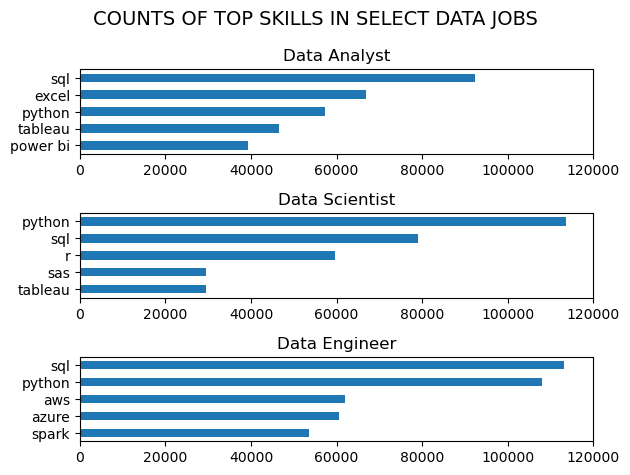

In [66]:
job_titles =['Data Analyst','Data Scientist','Data Engineer']


fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
  df_sub_p = df_skill_ana[df_skill_ana['job_title_short'] == job_title].head(5)
  df_sub_p.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
  ax[i].invert_yaxis()
  ax[i].set_xlim(0,120000)
  ax[i].set_ylabel('')
  ax[i].legend().set_visible(False)


fig.suptitle('COUNTS OF TOP SKILLS IN SELECT DATA JOBS', fontsize= 14)
fig.tight_layout()

  